In [21]:
import pandas as pd

df = pd.read_csv("results.csv")
df

,model_name,resolution,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B)
0,yolo8n,160,0.440909,0.219033,0.223262,0.144328
1,yolo8n,320,0.575170,0.385130,0.415337,0.284760
2,yolo8n,640,0.633393,0.474298,0.520901,0.370972
3,yolo8n,1280,0.568605,0.448086,0.471559,0.304583
4,yolo9n,160,0.437445,0.225064,0.221614,0.143407
...,...,...,...,...,...,...
75,yolo10x,1280,0.711351,0.606194,0.656095,0.470976
76,yolo11x,160,0.637024,0.439706,0.480510,0.340806
77,yolo11x,320,0.731799,0.579581,0.640182,0.478449
78,yolo11x,640,0.739340,0.658514,0.713003,0.547384


In [22]:
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["model_size"] = df["model_name"].str[-1]

In [23]:
df

,model_name,resolution,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),yolo_version,model_size
0,yolo8n,160,0.440909,0.219033,0.223262,0.144328,8,n
1,yolo8n,320,0.575170,0.385130,0.415337,0.284760,8,n
2,yolo8n,640,0.633393,0.474298,0.520901,0.370972,8,n
3,yolo8n,1280,0.568605,0.448086,0.471559,0.304583,8,n
4,yolo9n,160,0.437445,0.225064,0.221614,0.143407,9,n
...,...,...,...,...,...,...,...,...
75,yolo10x,1280,0.711351,0.606194,0.656095,0.470976,10,x
76,yolo11x,160,0.637024,0.439706,0.480510,0.340806,11,x
77,yolo11x,320,0.731799,0.579581,0.640182,0.478449,11,x
78,yolo11x,640,0.739340,0.658514,0.713003,0.547384,11,x


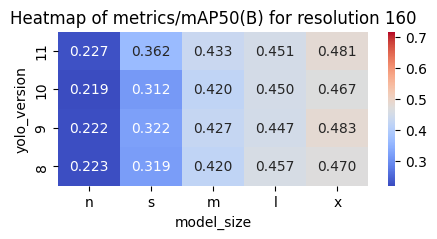

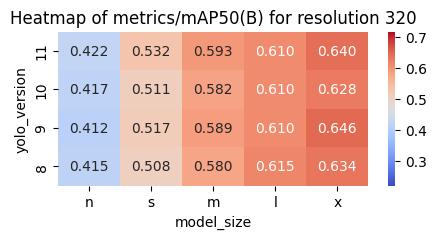

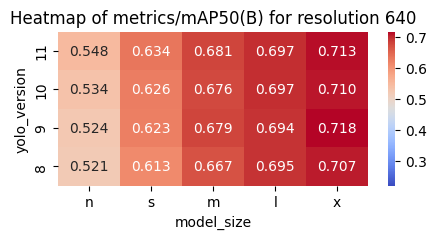

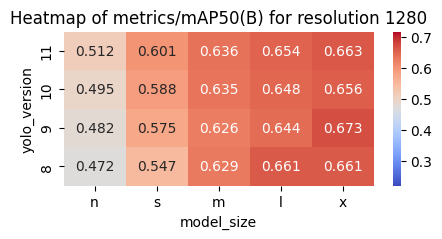

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure yolo_version is treated as string for proper indexing
df["yolo_version"] = df["yolo_version"].astype(str)

# Desired order for sorting
yolo_version_order = ["8", "9", "10", "11"]
yolo_version_order.reverse()
model_size_order = ["n", "s", "m", "l", "x"]

# Create a pivot table and plot heatmap for each metric for each unique resolution
metrics = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
metrics = ["metrics/mAP50(B)"]
unique_resolutions = df["resolution"].unique()

for metric in metrics:
    # Calculate global min and max for the selected metric
    global_min = df[metric].min()
    global_max = df[metric].max()
    
    for resolution in unique_resolutions:
        df_res = df[df["resolution"] == resolution]
        pivot_table = df_res.pivot_table(index="yolo_version", columns="model_size", values=metric)
        
        # Reindex to ensure the specified order
        pivot_table = pivot_table.reindex(index=yolo_version_order, columns=model_size_order)
        
        plt.figure(figsize=(5, 2))  # Reduced figure size
        sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="coolwarm", vmin=global_min, vmax=global_max)
        plt.title(f"Heatmap of {metric} for resolution {resolution}")
        plt.show()

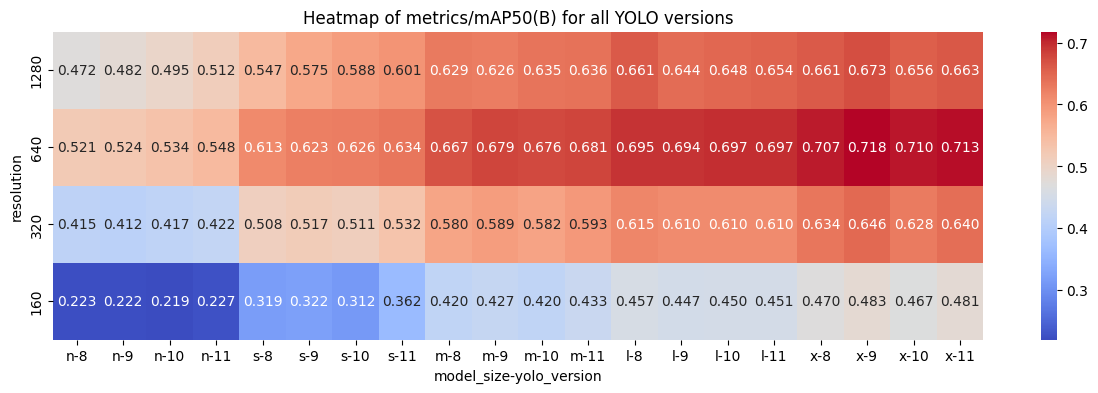

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure yolo_version is treated as string for proper indexing
df["yolo_version"] = df["yolo_version"].astype(str)

# Desired order for sorting
yolo_version_order = ["8", "9", "10", "11"]
model_size_order = ["n", "s", "m", "l", "x"]

# Create a pivot table and plot heatmap for each metric
metrics = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
metrics = ["metrics/mAP50(B)"]
unique_resolutions = sorted(df["resolution"].unique(), reverse=True)

for metric in metrics:
    # Calculate global min and max for the selected metric
    global_min = df[metric].min()
    global_max = df[metric].max()
    
    pivot_table = df.pivot_table(index="resolution", columns=["model_size", "yolo_version"], values=metric, aggfunc='mean')
    
    # Reindex to ensure the specified order and fill missing values with 0
    pivot_table = pivot_table.reindex(index=unique_resolutions, columns=pd.MultiIndex.from_product([model_size_order, yolo_version_order], names=["model_size", "yolo_version"]), fill_value=0)
    
    plt.figure(figsize=(15, 4))  # Adjusted figure size
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="coolwarm", vmin=global_min, vmax=global_max)
    plt.title(f"Heatmap of {metric} for all YOLO versions")
    plt.show()

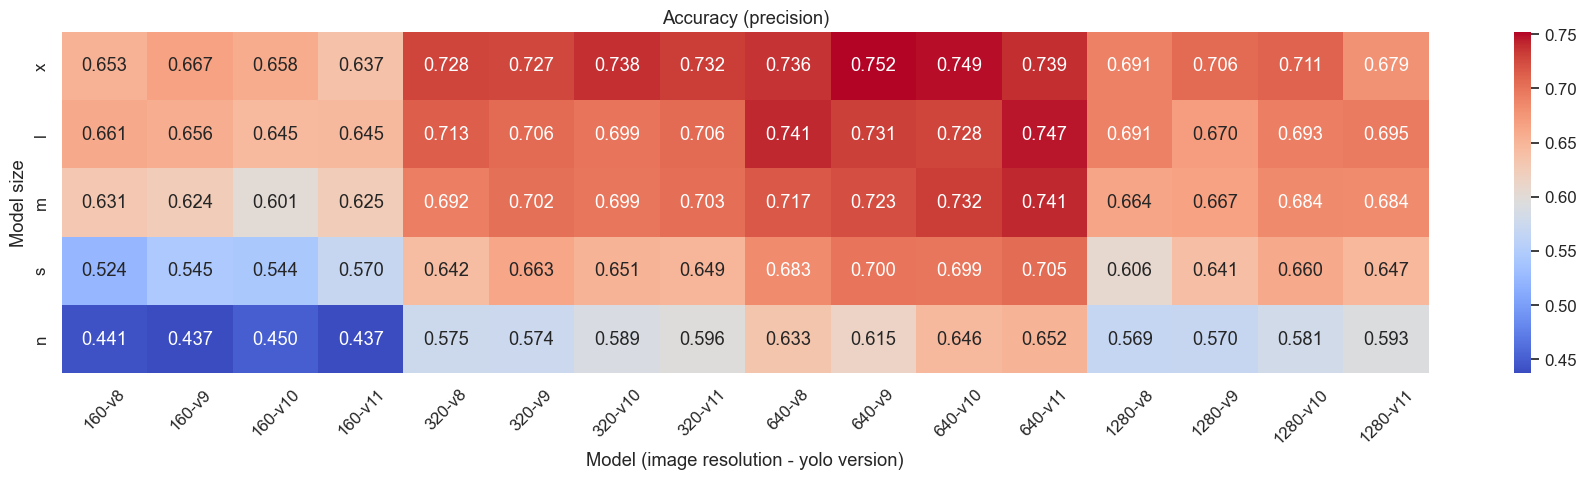

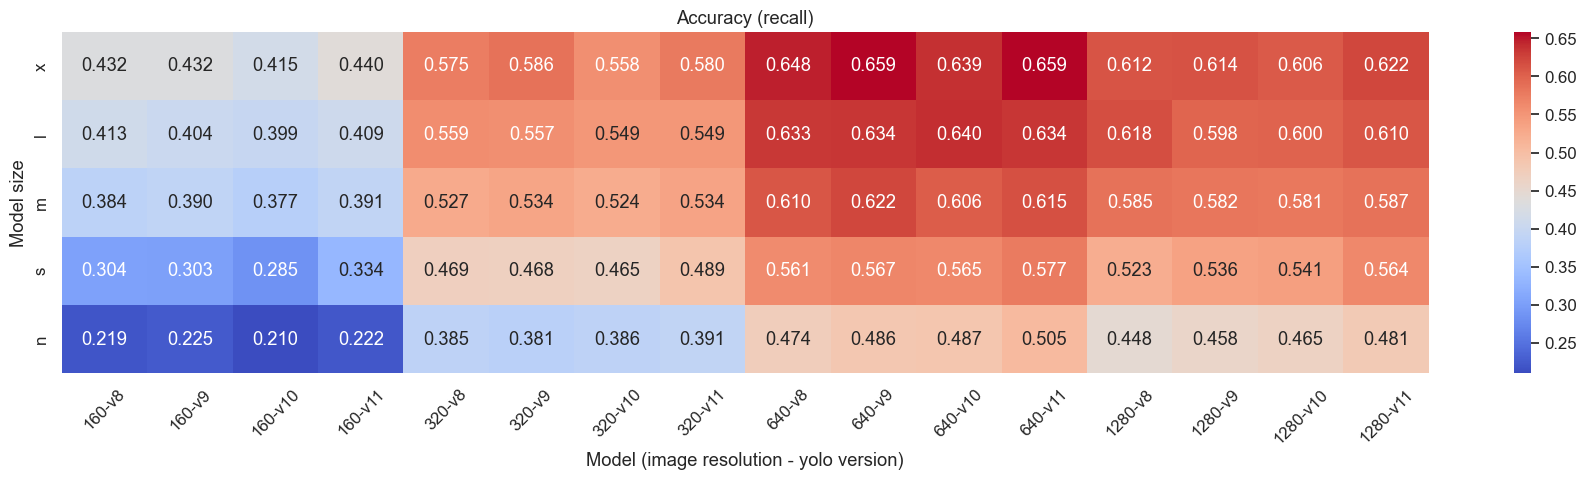

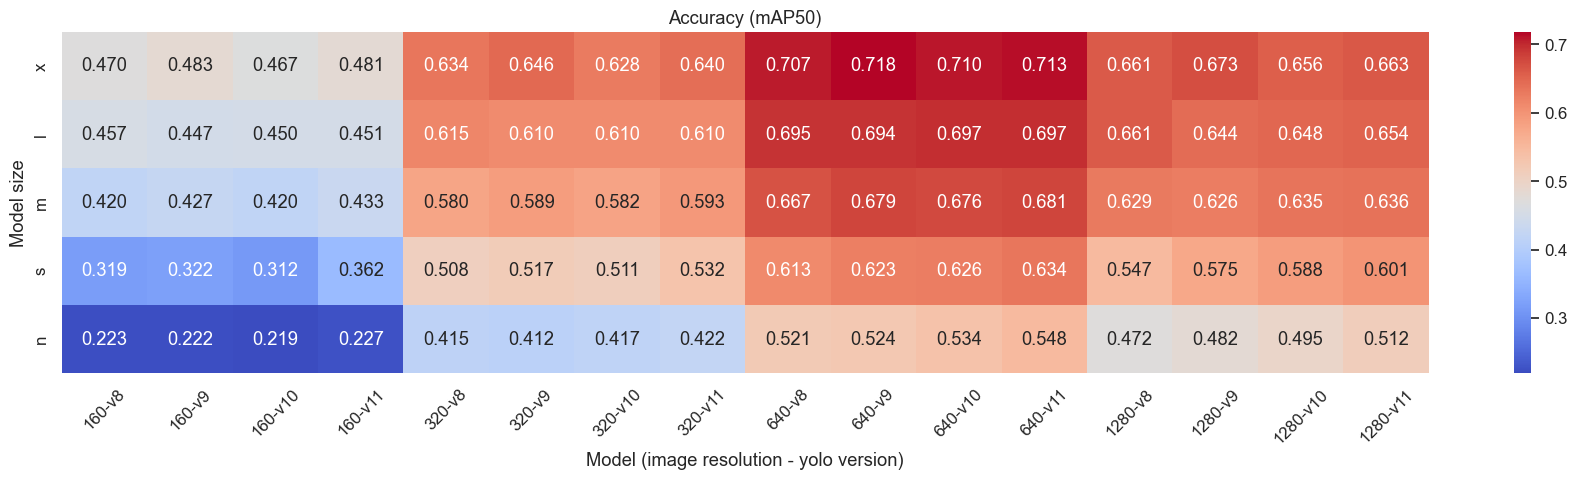

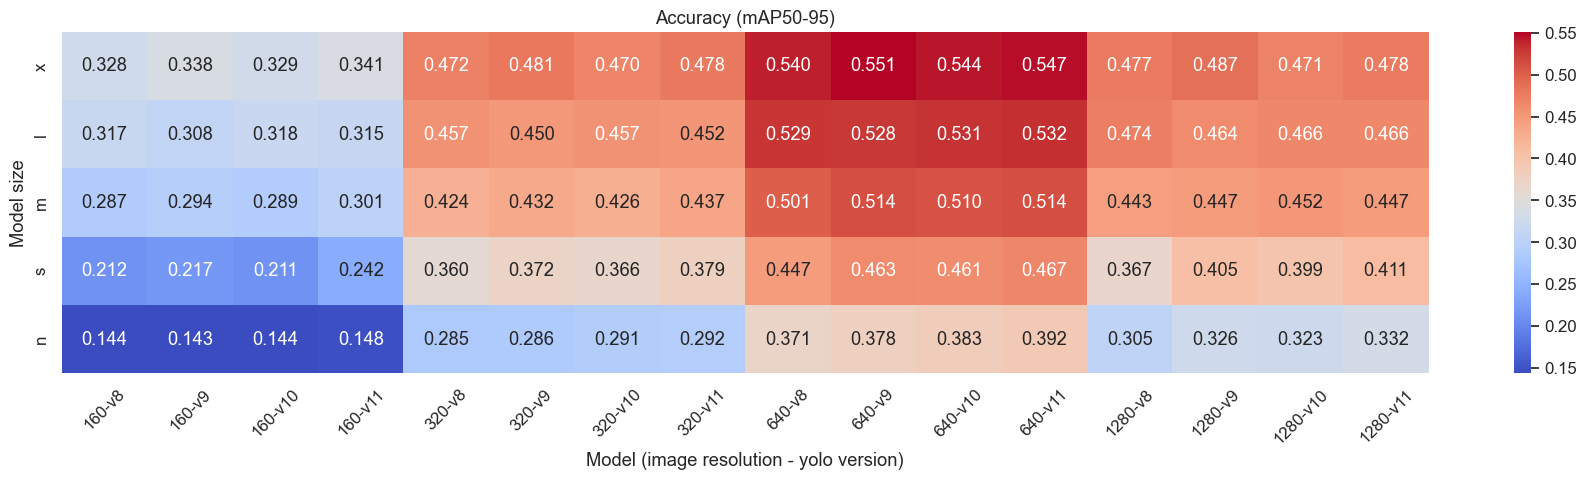

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure yolo_version is treated as string for proper indexing
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["yolo_version"] = "v" + df["yolo_version"].astype(str)

# Desired order for sorting
yolo_version_order = ["v8", "v9", "v10", "v11"]
model_size_order = ["n", "s", "m", "l", "x"]
model_size_order.reverse()
unique_resolutions = sorted(df["resolution"].unique())

# Use specific metrics for plotting
metrics = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
# metrics = ["metrics/mAP50(B)"]

for metric in metrics:
    # Calculate global min and max for the selected metric
    global_min = df[metric].min()
    global_max = df[metric].max()
    
    # Create pivot table with resolution as columns and model_size as rows
    pivot_table = df.pivot_table(index="model_size", columns=["resolution", "yolo_version"], values=metric, aggfunc='mean')
    
    # Reindex to ensure the specified order and fill missing values with 0
    pivot_table = pivot_table.reindex(index=model_size_order, columns=pd.MultiIndex.from_product([unique_resolutions, yolo_version_order], names=["resolution", "yolo_version"]), fill_value=0)
    
    plt.figure(figsize=(18, 5))  # Adjusted figure size
    # sns.set(font_scale=1.1)  # Adjust font size here
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="coolwarm", vmin=global_min, vmax=global_max)
    plt.title(f"Accuracy ({metric})", fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel("Model (image resolution - yolo version)")
    plt.ylabel("Model size")
    plt.title(f"Accuracy ({metric.replace('metrics/', '').replace('(B)', '')})")
    plt.tight_layout()
    plt.savefig("yolo_accuracy_table.png")
    plt.show()